In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

2024-07-15 11:37:08.691473: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 11:37:08.691651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 11:37:08.846878: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_data=pd.read_csv('/kaggle/input/dataset/Google_train_data.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_data.drop('Date',axis=1,inplace=True)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 49.3+ KB


In [6]:
train_data['Close']=train_data['Close'].replace(',', '', regex=True)
train_data['Volume']=train_data['Volume'].replace(',', '', regex=True)

In [7]:
train_data['Close']=train_data["Close"].astype(float)
train_data['Volume']=train_data["Volume"].astype(float)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 49.3 KB


In [9]:
train_data.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [10]:
train_data.shape

(1258, 5)

In [11]:
train_data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
train_data.duplicated().value_counts()

False    1258
Name: count, dtype: int64

In [13]:
train_data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000


In [14]:
train_data.cov()

,Open,High,Low,Close,Volume
Open,2.307496e+04,2.323556e+04,2.285816e+04,3.149160e+03,-1.832311e+08
High,2.323556e+04,2.341170e+04,2.302393e+04,3.134712e+03,-1.833209e+08
Low,2.285816e+04,2.302393e+04,2.266615e+04,3.199733e+03,-1.842595e+08
Close,3.149160e+03,3.134712e+03,3.199733e+03,2.714342e+04,7.205730e+07
Volume,-1.832311e+08,-1.833209e+08,-1.842595e+08,7.205730e+07,5.169828e+12


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='Volume', ylabel='Count'>

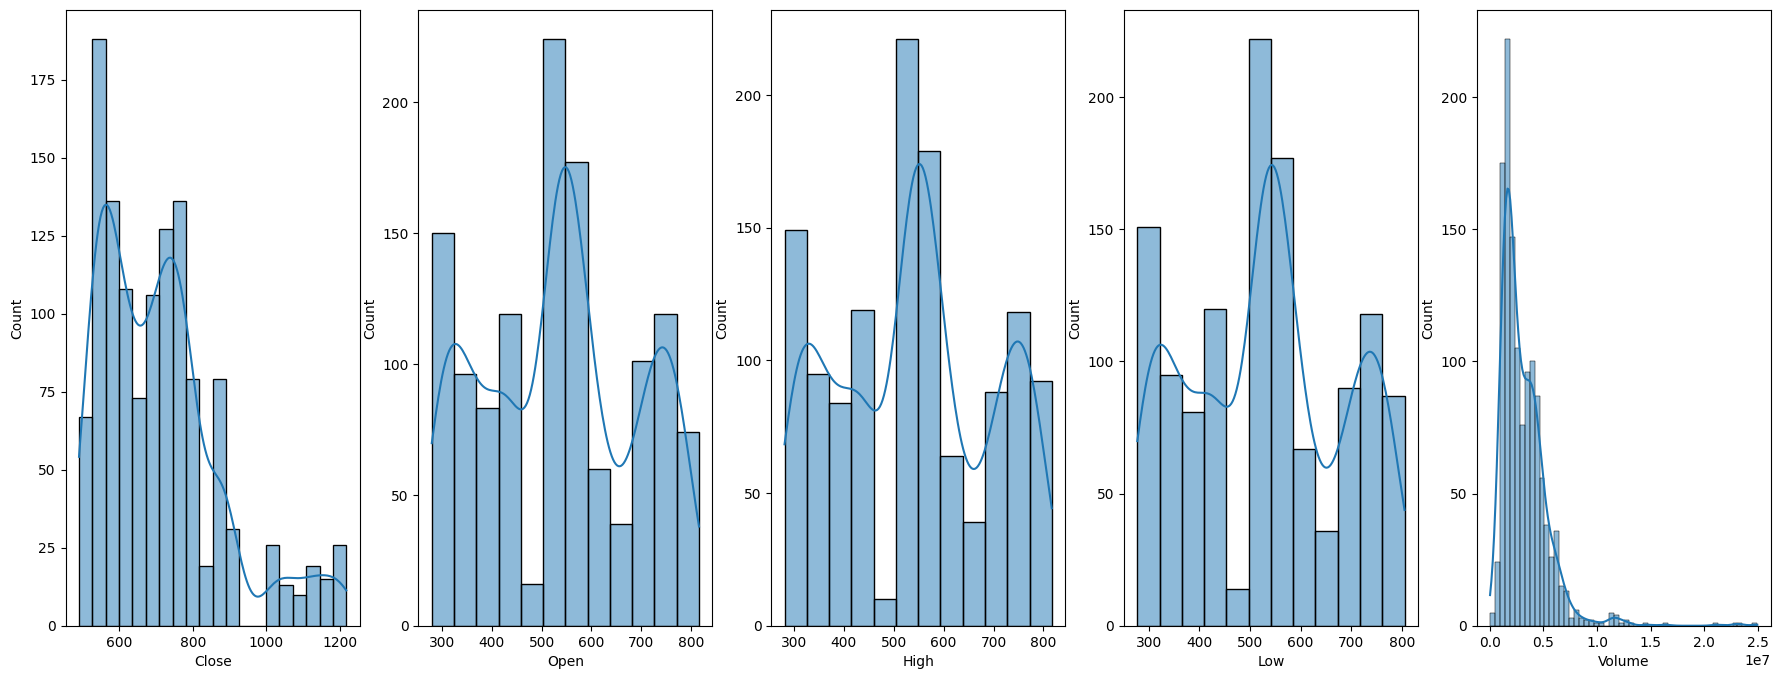

In [15]:
fig,ax = plt.subplots(1,5,figsize=(22,8))
sns.histplot(data=train_data, x ='Close' ,ax=ax[0],kde=True)
sns.histplot(data=train_data, x ='Open' ,ax=ax[1],kde=True)
sns.histplot(data=train_data, x ='High' ,ax=ax[2],kde=True)
sns.histplot(data=train_data, x ='Low' ,ax=ax[3],kde=True)
sns.histplot(data=train_data, x = 'Volume', ax = ax[4], kde=True)

<Axes: xlabel='Low'>

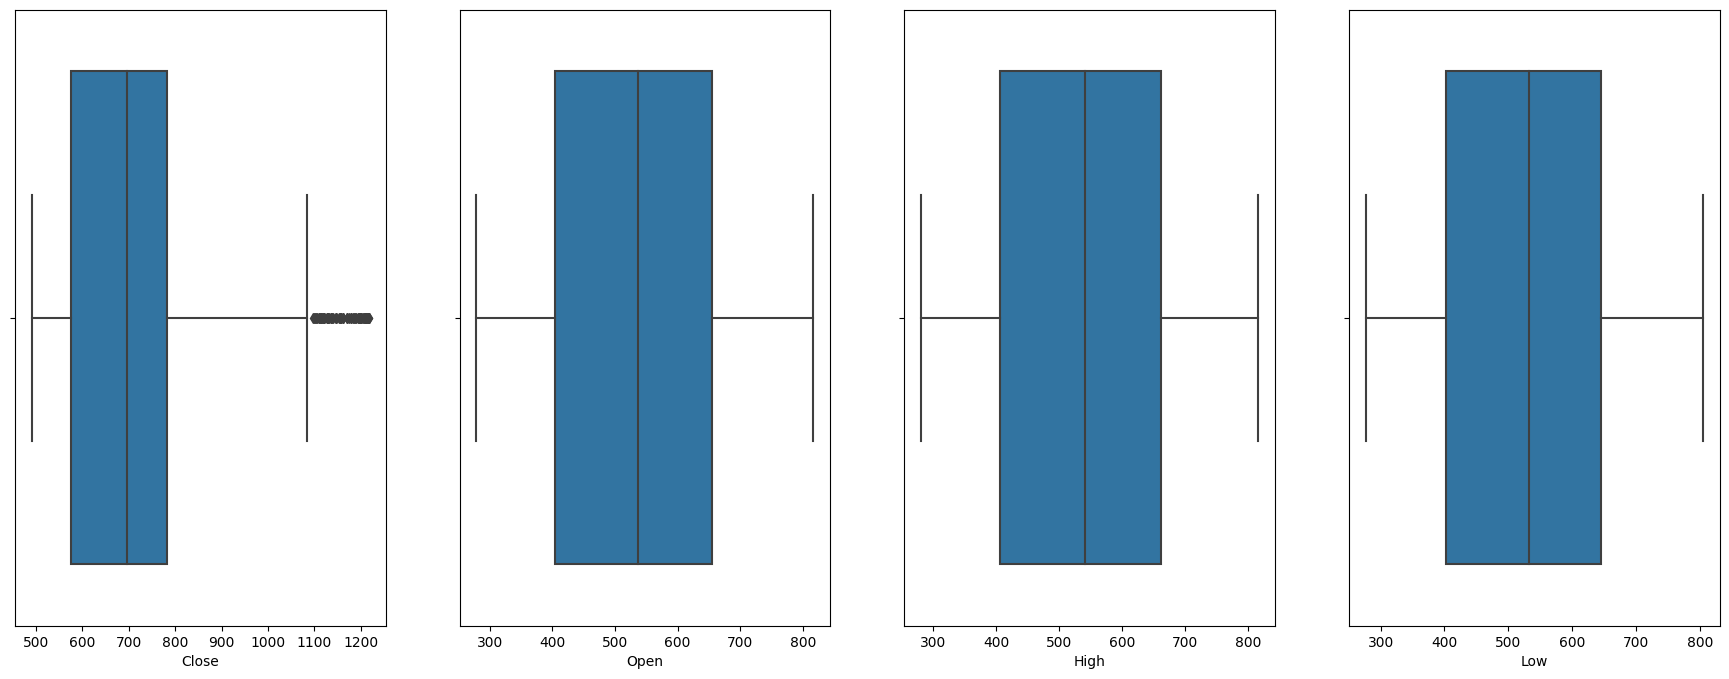

In [16]:
fig,ax = plt.subplots(1,4,figsize=(22,8))
sns.boxplot(data=train_data, x ='Close' ,ax=ax[0])
sns.boxplot(data=train_data, x ='Open' ,ax=ax[1])
sns.boxplot(data=train_data, x ='High' ,ax=ax[2])
sns.boxplot(data=train_data, x ='Low' ,ax=ax[3])

<Axes: xlabel='Close', ylabel='Volume'>

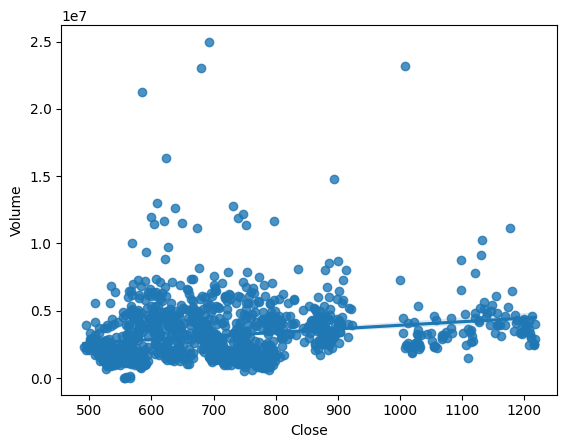

In [17]:
sns.regplot(data=train_data, x = 'Close',y='Volume')

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

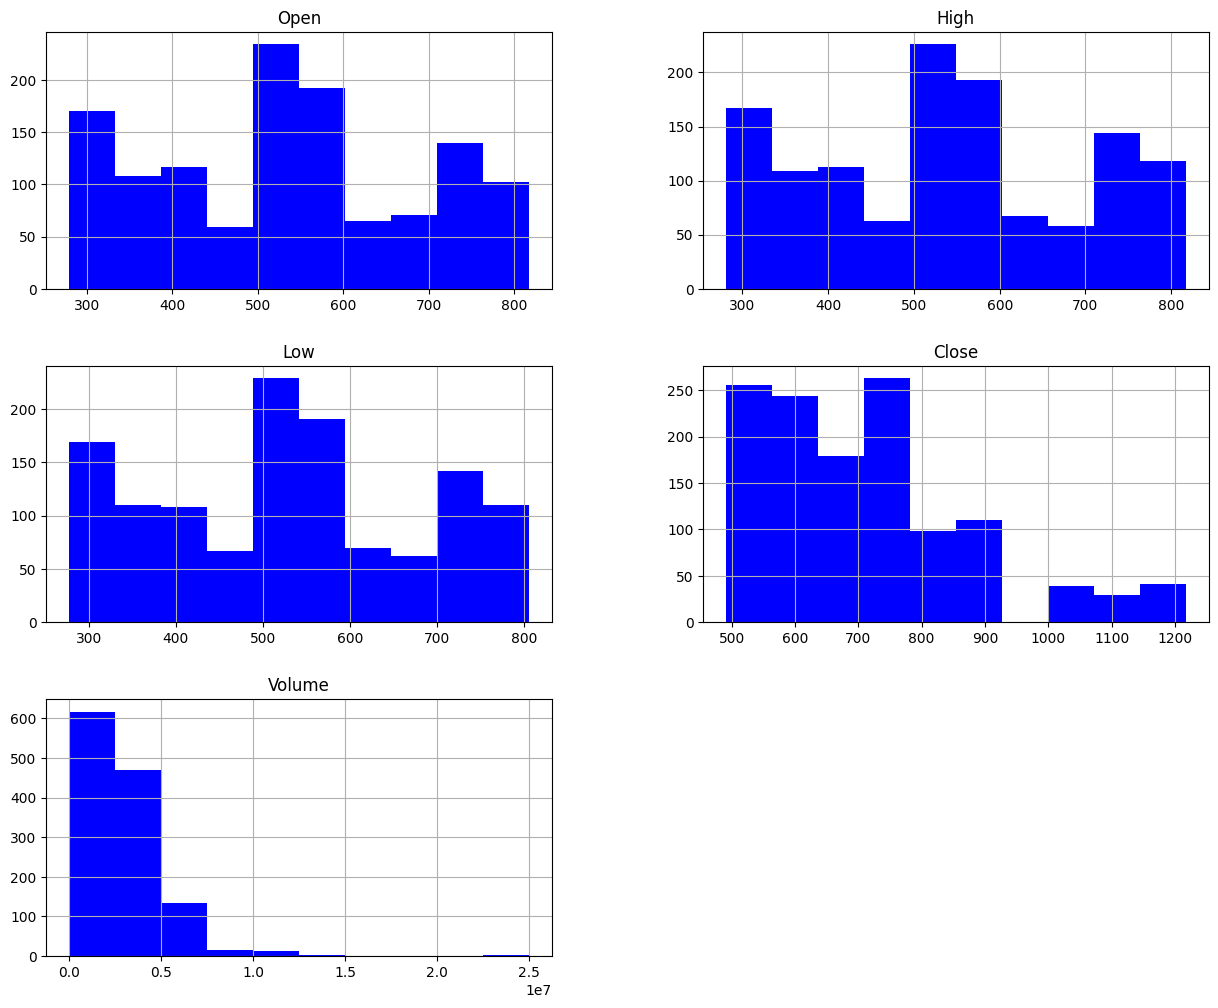

In [18]:
train_data.hist(figsize=(15,12),color='blue')

In [19]:
# 'Close" column is right skewed and also have outliers

In [20]:
train_data.head()


,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,7380500.0
1,331.27,333.87,329.08,666.45,5749400.0
2,329.83,330.75,326.89,657.21,6590300.0
3,328.34,328.77,323.68,648.24,5405900.0
4,322.04,322.29,309.46,620.76,11688800.0


In [21]:
High_end = train_data['Close'].quantile(.75) + 1.5*(train_data['Close'].quantile(.75)-train_data['Close'].quantile(.25))

In [22]:
train_data[train_data['Close']>High_end]

,Open,High,Low,Close,Volume
495,542.12,548.53,541.97,1097.61,6547600.0
496,551.85,555.82,550.50,1112.05,3456000.0
497,555.40,555.54,551.98,1108.80,1473800.0
498,554.92,557.41,552.27,1114.40,2685500.0
499,557.91,558.05,554.39,1115.34,3151100.0
...,...,...,...,...,...
555,597.73,602.55,595.45,1193.88,3381900.0
556,600.90,602.56,589.02,1179.80,6441000.0
557,589.88,590.24,570.84,1154.76,6096800.0
558,580.82,582.74,571.36,1155.55,4838400.0


In [23]:
X_train,X_test,y_train,y_test = train_test_split(train_data.drop('Close',axis=1), train_data['Close'],test_size=0.2,random_state=42)

In [24]:
X_train.isnull().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [25]:
X_train

,Open,High,Low,Volume
1200,777.71,789.38,775.87,1174900.0
199,368.68,372.10,366.85,4131800.0
1124,699.06,700.86,693.08,1184300.0
1158,783.75,786.81,782.78,786400.0
381,454.80,458.69,452.56,5187700.0
...,...,...,...,...
1044,700.32,710.89,697.68,2481100.0
1095,723.41,724.48,712.80,1692100.0
1130,685.47,692.32,683.65,1597700.0
860,536.35,537.20,532.52,1388200.0


In [26]:
trf1 = ColumnTransformer([
    ('High',StandardScaler(),[0,1,2])
], remainder = 'passthrough')

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [28]:
trf2 = ColumnTransformer([
    ('VolumeT',FunctionTransformer(np.log1p),[3])
],remainder = 'passthrough')

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline({
    ('trf1',trf1),
    ('trf2',trf2)
})

In [31]:
pipe.fit(X_train)

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('VolumeT',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [3])])),
                ('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('High', StandardScaler(),
                                                  [0, 1, 2])]))])

In [32]:
X_train_scaled = pipe.fit_transform(X_train)

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled

,Open,High,Low,Volume
0,-1.137492,1.590690,1.628188,775.87
1,0.698153,-1.099659,-1.097106,366.85
2,-1.125860,1.073378,1.050056,693.08
3,-1.723531,1.630417,1.611403,782.78
4,1.030352,-0.533214,-0.531579,452.56
...,...,...,...,...
1001,-0.046322,1.081666,1.115562,697.68
1002,-0.605004,1.233538,1.204320,712.80
1003,-0.688800,0.983992,0.994280,683.65
1004,-0.893974,0.003172,-0.018823,532.52


In [34]:
X_train_scaled.isnull().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [35]:
X_train_scaled.describe()

,Open,High,Low,Volume
count,1.006000e+03,1.006000e+03,1.006000e+03,1006.000000
mean,7.310256e-16,4.767558e-17,1.765762e-18,531.123827
std,1.000497e+00,1.000497e+00,1.000497e+00,150.713649
min,-8.438954e+00,-1.688730e+00,-1.690717e+00,277.500000
25%,-6.929171e-01,-8.582359e-01,-8.566476e-01,403.335000
50%,-4.033364e-02,1.681967e-02,1.637973e-02,535.055000
75%,7.097374e-01,7.922279e-01,8.111646e-01,651.555000
max,3.324601e+00,1.847011e+00,1.806487e+00,805.140000


In [36]:
trf = ColumnTransformer([
    ('std',StandardScaler(),[0,1,2,3])
])

In [37]:
pipe1 = Pipeline({
    ('trf1',trf)
})

In [38]:
X_train_scaled = pipe1.fit_transform(X_train_scaled)

In [39]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.describe()

,Open,High,Low,Volume
count,1.006000e+03,1.006000e+03,1.006000e+03,1.006000e+03
mean,3.531525e-18,2.472067e-17,1.765762e-18,-8.122506e-16
std,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00
min,-8.438954e+00,-1.688730e+00,-1.690717e+00,-1.683656e+00
25%,-6.929171e-01,-8.582359e-01,-8.566476e-01,-8.483133e-01
50%,-4.033364e-02,1.681967e-02,1.637973e-02,2.609670e-02
75%,7.097374e-01,7.922279e-01,8.111646e-01,7.994702e-01
max,3.324601e+00,1.847011e+00,1.806487e+00,1.819029e+00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='Volume', ylabel='Count'>

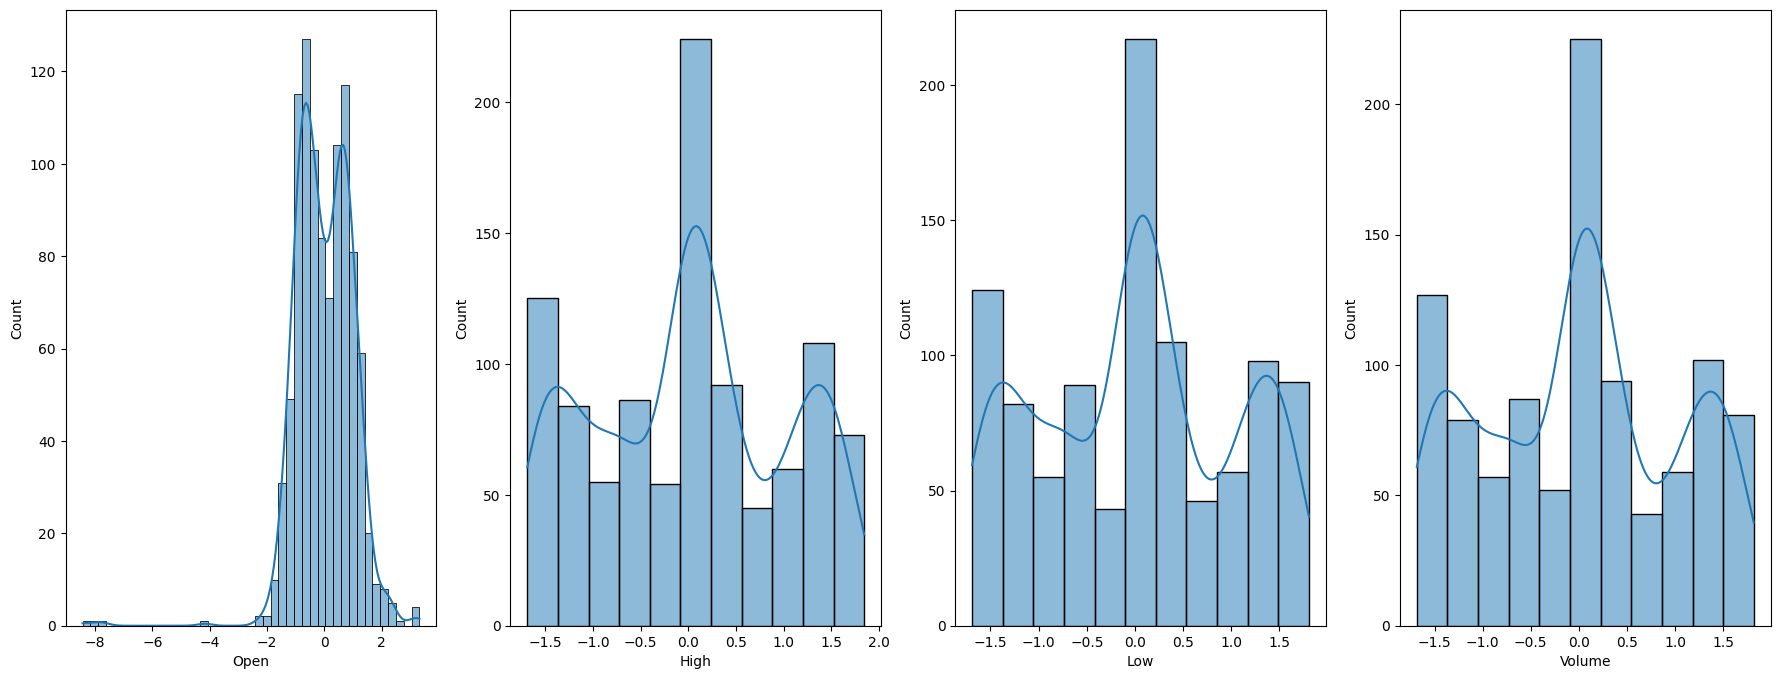

In [40]:
fig,ax = plt.subplots(1,4,figsize=(22,8))
sns.histplot(data=X_train_scaled, x ='Open' ,ax=ax[0],kde=True)
sns.histplot(data=X_train_scaled, x ='High' ,ax=ax[1],kde=True)
sns.histplot(data=X_train_scaled, x ='Low' ,ax=ax[2],kde=True)
sns.histplot(data=X_train_scaled, x = 'Volume', ax = ax[3], kde=True)

In [41]:
X_test_scaled = pipe.transform(X_test)
X_test_scaled = pipe1.transform(X_test_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Open,High,Low,Volume
0,-6.028261,0.156490,0.161958,0.172706
1,1.042458,-1.572507,-1.578121,-1.580363
2,1.272509,-1.490290,-1.490996,-1.475410
3,0.688654,-1.409980,-1.419285,-1.413938
4,-1.082388,1.362520,1.338338,1.360382
...,...,...,...,...
247,0.928902,-1.328486,-1.333728,-1.329763
248,0.629954,0.395315,0.402237,0.390047
249,0.038254,-0.558208,-0.581346,-0.552340
250,0.381652,-1.154909,-1.169797,-1.154908


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
y_train.describe()

count    1006.000000
mean      710.511680
std       163.574424
min       494.030000
25%       575.772500
50%       694.160000
75%       779.482500
max      1216.830000
Name: Close, dtype: float64

In [44]:
mod = LinearRegression()
mod.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
predicted_price = mod.predict(X_test_scaled)

In [46]:
mse = metrics.mean_squared_error(y_test, predicted_price)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, predicted_price)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 19890.014041716055
Root Mean Squared Error (RMSE): 141.03196106456173
Mean Absolute Error (MAE): 105.07263454951857


In [47]:
from sklearn import tree
mod1 = tree.DecisionTreeRegressor()

In [48]:
mod1.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
predicted_price = mod1.predict(X_test_scaled)

In [50]:
mse = metrics.mean_squared_error(y_test, predicted_price)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, predicted_price)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 28781.66311150794
Root Mean Squared Error (RMSE): 169.6515933067177
Mean Absolute Error (MAE): 129.053373015873


In [51]:
from sklearn import svm
mod2 = svm.SVR()
mod2.fit(X_train_scaled,y_train)
predicted_price = mod2.predict(X_test_scaled)

In [52]:
mse = metrics.mean_squared_error(y_test, predicted_price)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, predicted_price)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 27023.3025253151
Root Mean Squared Error (RMSE): 164.3876592853463
Mean Absolute Error (MAE): 95.95838225405477


In [53]:
train_data.columns.values

array(['Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [54]:
close_train=train_data.iloc[:,4:5].values
close_train

array([[7380500.],
       [5749400.],
       [6590300.],
       ...,
       [1153800.],
       [ 744300.],
       [1770000.]])

In [55]:
normalizer= MinMaxScaler(feature_range=(-1,1))
train_set_scaled=normalizer.fit_transform(close_train)

In [56]:
train_set_scaled

array([[-0.40948338],
       [-0.54012815],
       [-0.47277533],
       ...,
       [-0.90821786],
       [-0.94101722],
       [-0.85886264]])

In [57]:
x_train= []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [58]:
regressor = Sequential()

regressor.add(LSTM(units = 256, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))


regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))




regressor.add(Dense(units = 1, activation = 'selu'))
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])


regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - loss: 0.1223 - mean_absolute_error: 0.2303
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - loss: 0.0202 - mean_absolute_error: 0.0893
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - loss: 0.0242 - mean_absolute_error: 0.0963
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0196 - mean_absolute_error: 0.0861
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0246 - mean_absolute_error: 0.0952
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0286 - mean_absolute_error: 0.0891
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0249 - mean_absolute_error: 0.0938
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 0.0190 - mean_absolute_error: 0.0870
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - loss: 0.0208 - mean_absolute_error: 0.0894
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - loss: 0.0185 - mean_absolute_error: 0.0849
Epoch 11/100
38

In [69]:
testData=pd.read_csv('/kaggle/input/dataset/Google_train_data.csv')

In [70]:
testData.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [71]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.values
inputClosing_scaled = normalizer.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1089, 60, 1)

In [63]:
print('X_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (1198, 60, 1)
y_train Shape:  (1198,)
X_test Shape:   (1089, 60, 1)
y_test Shape:   (1089, 1)


In [64]:
predicted_price= regressor.predict(X_test)
predicted_price = normalizer.inverse_transform(predicted_price)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


In [65]:
r2_score(y_test,predicted_price)

-82588356.21321435

In [66]:
# Evaluate the model
mse = metrics.mean_squared_error(y_test, predicted_price)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, predicted_price)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1083312332179.9954
Root Mean Squared Error (RMSE): 1040822.9110564368
Mean Absolute Error (MAE): 1040822.9089715336


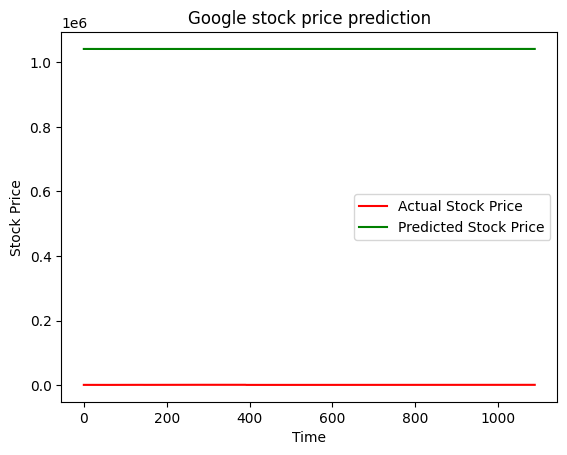

In [67]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()